# Entrega do Handson 06

## Reconstrução ideal do sinal amostrado (Prática 2: Passos 1 e 2)

### Código corrigido em Matlab

O código original definiu uma frequência de corte para o filtro menor do que a maior frequência presente no sinal original. Isso distorcia o sinal retirando a componente de maior frequência. Para resolver foi necessário aumentar a frequência de corte do filtro.

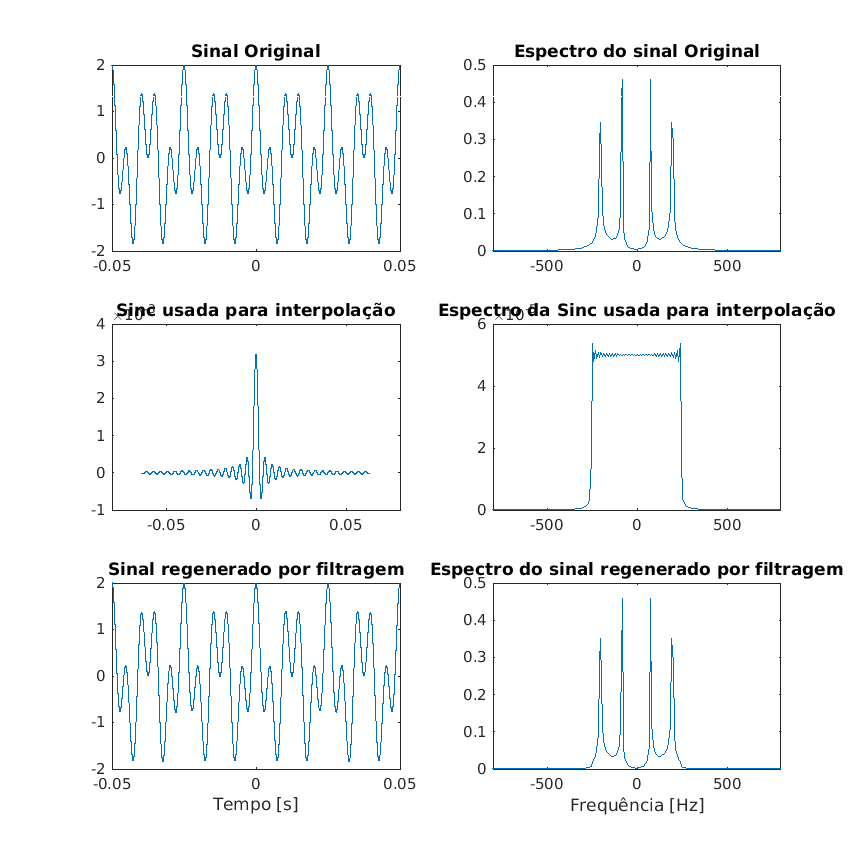

In [10]:
clear all;clc;close all;
%% Parâmetros da Sinc
B=250;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
Am=2*Ts*B;                                                  % Amplitude do sinal
s= Am*sinc(2*B*t);                                          % Sinc para reconstrução no tempo
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)

%% Convolução
c=conv(s,m);                                                % Calcula a convolução e realiza a filtragem no tempo
c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor
    
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft);                               % Sinal M(f) 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Gráficos 
% Plot do Sinal no tempo
fig = figure;
subplot(3,2,1);                                      
plot(t,m);
title('Sinal Original');
axis([-0.05 0.05 -2 2]);
% Plot do Sinal na frequência                   
subplot(3,2,2);
plot(freq,abs(M));        
title('Espectro do sinal Original');
axis([-800 800 0 0.5]);
%------------------------------------
% Plot do Sinc no tempo
subplot(3,2,3);                                      
plot(t,s);
title('Sinc usada para interpolação');
axis([-0.08 0.08 -1e-3 4e-3]);
% Plot do Sinc na frequência                   
subplot(3,2,4);
plot(freq,abs(S));       
title('Espectro da Sinc usada para interpolação');
axis([-800 800 0 6e-5]);
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5);
plot(t,c);      
title('Sinal regenerado por filtragem');
xlabel('Tempo [s]');
axis([-0.05 0.05 -2 2]);
% Plot da convolução na frequência   
subplot(3,2,6);
plot(freq,abs(C));
title('Espectro do sinal regenerado por filtragem');
xlabel('Frequência [Hz]');
axis([-800 800 0 0.5]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];

### Código corrigido em python

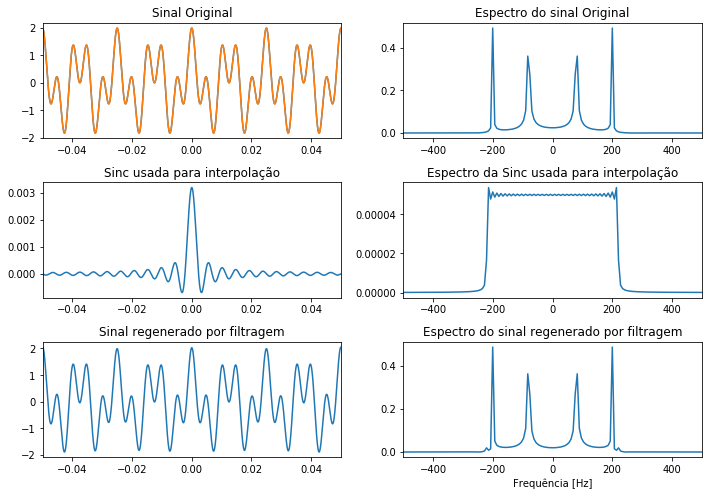

In [2]:
from scipy.fftpack import fft, fftshift
import numpy as np
from matplotlib import pyplot as plt

## Parâmetros da Sinc
B=220                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(2*B*t)                                       # Sinc 
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)

## Convolução
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
## Espectros
lfft=len(s)                                                # Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft)                               # Sinal M(f) 
freq = np.arange(-Fs/2,Fs/2-Fs/lfft,Fs/lfft)               # Eixo da frequência
# Gráficos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])
#
plt.subplot(323)
plt.title("Sinc usada para interpolação")
plt.plot(t,s)
plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("Espectro da Sinc usada para interpolação")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal regenerado por filtragem")
plt.plot(t,c)
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal regenerado por filtragem")
plt.plot(freq,np.abs(C))
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#
plt.tight_layout(pad=1.1)
plt.show()

## Prática 3 quantização:  

Cálculo da SQNR nos sinais quantizados. Podemos perceber que apenas quando utilizando 16 níveis de quantização é possível alcançar uma SQNR maior que 48.5 dB.

### Cógido em Python 

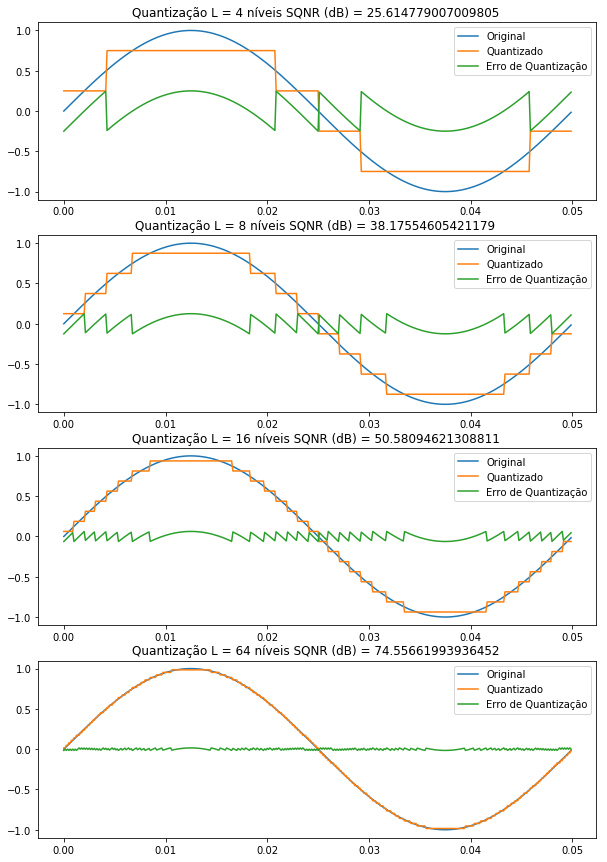

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
L= [ 4, 8, 16, 64 ];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[10,15])
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    
    # Calculo da SQNR pela variância
    sqnr1=20*np.log10(np.var(m_t)/np.var(m_t-q_out))

    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis SQNR (dB) = {} '.format(Li,sqnr1))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
    
plt.show()

### Código em Matlab 

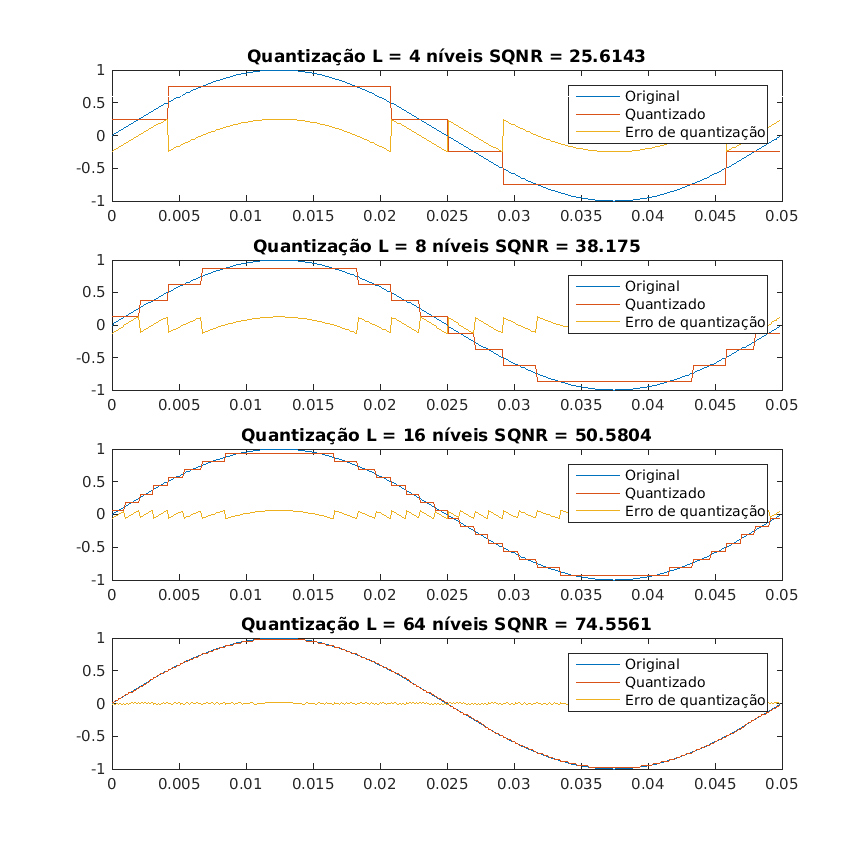

In [5]:


clc; clear all;close all;
%% Parâmetros
fs=8000;                                            % Frequência de amostragem
Ts=1/fs;                                            % Período de amostragem
fm=20;                                              % Frequência da onda
Tm=1/fm;                                            % Período de amostragem
t=0:Ts:Tm-Ts;                                       % Eixo do tempo
m_t=sin(2*pi*20*t);                                 % Sinal m(t)
L= [ 4 8 16 64 ];                                   % Vetor com níveis de quantização

sig_max=max(m_t);                                   % Encontra pico máximo
sig_min=min(m_t);                                   % Encontra pico mínimo
%% Quantização com round() para cada nível de quantização especificado
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];
for il = 1:length(L)
    Li = L(il);
    Delta=(sig_max-sig_min)/Li;                     % Intervalo de quantização (separação entre um nível e outro)
    q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;  % Vetor com amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    %
    sigp=m_t-sig_min;                               % Deixa o sinal somente com amplitudes positivas (shift para cima)
    % Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta);                            
    sigp=sigp+1/2;                                  % Tira elementos do zero
    % Agora que nenhum valor do sinal agora é zero nem negativo: isso é importante para que o vetor comece de 1
    qindex=round(sigp);                             % Encontra inteiro mais proximo para cada elemento
    qindex=min(qindex,Li);                          % Trunca o excedente de qindex
    q_out=q_level(qindex);                          % Calcula a amplitude quantizada de cada amostra
    
    %Calculo da SQNR
    sqnr1=20*log10(bandpower(m_t)/bandpower(m_t-q_out));
    sqnr2=20*log10(var(m_t)/var(m_t-q_out));
    
    % Gráficos
    subplot(length(L),1,il)
    plot (t,m_t,t,q_out,t,(m_t-q_out));
    legend('Original', 'Quantizado','Erro de quantização');
    title(['Quantização L = ' num2str(Li) ' níveis SQNR (dB) = ' num2str(sqnr1)]);
end

## Quantização do primeiro sinal